In [ ]:
import pandas as pd                   
import numpy as np                     
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv('data_encoded.csv')

### preparação de algumas variaveis para o modelo

In [ ]:
df["n_children"] = df["children_0-5"] + df["children_6-10"] + df["children_6-10"] + df["children_11"]
df["n_children"] = df["n_children"].clip(0, 3)

In [ ]:
### creating the variables of studying and working
df["_work_study"] = df["occupation"].map({"Graduate student": "studying", #done 
                                                    "Researcher": "studying and working", #done
                                                    "Working Student": "studying and working", #done
                                                    "Freelancer": "working", "done"
                                                    "Undergrad student": "studying", #done
                                                    "Retired": "none", #done
                                                    "Unemployed": "none",
                                                    'Business owner': "working",
                                                    "Employee": "working"})



df["working"] =  np.where((df['_work_study'] == "working") | (df['_work_study'] == "studying and working"), 1, 0)
df["studying"] =  np.where((df['_work_study'] == "studying") | (df['_work_study'] == "studying and working"), 1, 0)
#df[["working", "studying", "_work_study"]]

In [ ]:
df["retired"] =  np.where((df['occupation'] == "Retired"), 1, 0)
df["business_owner"] =  np.where((df['occupation'] == "Business owner"), 1, 0)
df["student"] =  np.where((df['occupation'] == "Graduate student") | (df['occupation'] == "Working Student") | (df['occupation'] == "Undergrad student"), 1, 0)

df["freelancer"] =  np.where((df['occupation'] == "Freelancer"), 1, 0)
df["unemployed"] =  np.where((df['occupation'] == "Unemployed"), 1, 0)
df["employee"] =  np.where((df['occupation'] == "Employed"), 1, 0)
df["researcher"] =  np.where((df['occupation'] == "Researcher"), 1, 0)

In [ ]:
## simplifying variables: by adding parking_...._free to parking_...._permit
df["park_work_free_perm"] =  np.where((df['parking_work_free'] == 1) | (df['parking_work_permit'] == 1), 1, 0)
df["park_home_free_perm"] =  np.where((df['parking_home_free'] == 1) | (df['parking_home_permit'] == 1), 1, 0)

#df[["park_work_free_perm", "parking_work_free",'parking_work_permit']]

In [ ]:
df["commute_time"].value_counts()/8
df["commute_time_4"]=   np.where((df["commute_time"] == 4), 1, 0)
df["commute_time_3"]=   np.where((df["commute_time"] == 3), 1, 0)
df["commute_time_2"]=   np.where((df["commute_time"] == 2), 1, 0)
df["commute_time_1"]=   np.where((df["commute_time"] == 1), 1, 0)

In [ ]:
## creating the variable of no_commute (retired people, unemployed, the ones that work from home) 
df["no_commute"] =  np.where(((df["car_commute"] == 0) & (df["pt_commute"] == 0) & (df["active_commute"] == 0)) | (df["commute_home"] == 1), 1, 0)
df["commute_collective"] = np.where((df["commute_Train"] == 1) | (df["commute_Subway"] == 1) | (df["commute_Boat"] == 1) | (df["commute_Boat"] == 1), 1, 0)
df["commute_boat_train"] = np.where((df["commute_Train"] == 1) | (df["commute_Boat"] == 1) | (df["commute_Boat"] == 1), 1, 0)
df["commute_boat_subway"] = np.where((df["commute_Subway"] == 1) | (df["commute_Boat"] == 1), 1, 0)


#df[["no_commute","car_commute","pt_commute", "active_commute", "commute_home"]]

In [ ]:
df['nationality_'] = df['nationality'].map({'portugal': 'portuguese', 'brazil': 'brazilian','germany': 'german'}).fillna('others')
df["portuguese"] =  np.where((df['nationality_'] == "portuguese"), 1, 0)
df["brazilian"] =  np.where((df['nationality_'] == "brazilian"), 1, 0)
df["german"] =  np.where((df['nationality_'] == "german"), 1, 0)

In [ ]:
df["city_small"] =  np.where((df['city_size_encoded'] == 1), 1, 0)
df["city_medium"] =  np.where((df['city_size_encoded'] == 2), 1, 0)
df["city_large"] =  np.where((df['city_size_encoded'] == 3), 1, 0)

In [ ]:
df["only_active_commute"] =  np.where(((df['car_commute'] == 0) & (df['pt_commute'] == 0) & (df['active_commute'] == 1)), 1, 0)
df["only_pt_commute"] =  np.where(((df['pt_commute'] == 1) & (df['car_commute'] == 0) & (df['active_commute'] == 0)), 1, 0)
df["only_car_commute"] =  np.where(((df['car_commute'] == 1) & (df['pt_commute'] == 0) & (df['active_commute'] == 0)), 1, 0)

df["car_active_commute"] =  np.where(((df['car_commute'] == 1) & (df['pt_commute'] == 0) & (df['active_commute'] == 1)), 1, 0)
df["pt_active_commute"] =  np.where(((df['pt_commute'] == 1) & (df['car_commute'] == 0) & (df['active_commute'] == 1)), 1, 0)
df["car_pt_commute"] =  np.where(((df['car_commute'] == 1) & (df['pt_commute'] == 1) & (df['active_commute'] == 0)), 1, 0)
df["all_commute"] =  np.where(((df['car_commute'] == 1) & (df['pt_commute'] == 1) & (df['active_commute'] == 1)), 1, 0)


In [ ]:
df["children_infant"] =  np.where((df['children_0-5'] != 0), 1, 0)
df["children_young"] =  np.where((df['children_6-10'] != 0), 1, 0)

In [ ]:
df["only_bus"] =  np.where(((df['commute_Bus'] == 1) & (df['commute_Train'] == 0) & (df['commute_Subway'] == 0)), 1, 0)
df["only_train"] = np.where(((df['commute_Bus'] == 0) & (df['commute_Train'] == 1) & (df['commute_Subway'] == 0)), 1, 0)
df["only_sub"] =  np.where(((df['commute_Bus'] == 0) & (df['commute_Train'] == 0) & (df['commute_Subway'] == 1)), 1, 0)
df["only_walking"] =  np.where(((df['car_commute'] == 0) & (df['pt_commute'] == 0) & (df['commute_Walking'] == 1) & (df['commute_Bicycle'] == 0)), 1, 0)
df["only_bike"] =  np.where(((df['car_commute'] == 0) & (df['pt_commute'] == 0) & (df['commute_Walking'] == 0) & (df['commute_Bicycle'] == 1)), 1, 0)


df["bus_train"] =  np.where(((df['commute_Bus'] == 1) & (df['commute_Train'] == 1) & (df['commute_Subway'] == 0)), 1, 0)
df["bus_sub"] =  np.where(((df['commute_Bus'] == 1) & (df['commute_Train'] == 0) & (df['commute_Subway'] == 1)), 1, 0)
df["train_sub"] = np.where(((df['commute_Bus'] == 0) & (df['commute_Train'] == 1) & (df['commute_Subway'] == 1)), 1, 0)

### columns master and respective correlations

In [ ]:
columns_not_relevant = [
    "dimension",
     ## Likert
    'usefulness',
    'safety',
    'security',
    'stress',
    'comfort',
    'order',
    'liveability',
    #other_gender, (only 1) # 'disability', (only 4)
    "urban_density_sc",
    ]

In [ ]:
columns_master = [
    ## interventions, using "active" as baseline
    "shared",
    "free",
    "pedestrian",
    "car", 
    "transit", 
    'context', 
    
    ## socio-demographics
    "age_scaled",
    "female",
    "children",
    "n_children",
    #"children_0-5",
    #"children_6-10", 
    #"children_11", 
    "children_young",
    "children_infant",
    "dog", 
    "pet",

    ## background on urban planning
    "specialist",
    'role_academic',
    'role_professional', 
    'role_public', 
    'role_private', #only 9 # 
    'role_technology', #,only 6 # 
    'role_nonprofit', #only 7

    ## specifics about the categories generated with occupation
    "working",
    "studying",
    "retired",
    "business_owner",
    "student",
    "freelancer",
    "employee",
    "unemployed",
    "researcher",


    ## specific modes of transport included in the commute: 
    'commute_Walking', 
    'commute_Train', 
    'commute_Subway',
    'commute_Bus', 
    'commute_Bicycle',
    'commute_motorscooter',
    'commute_Boat',
    'car_commute', # 'commute_Private Car' and commute_TVDE

    ## combinations of types of transport:
    "all_commute",
    "pt_active_commute",
    "car_active_commute",
    "car_pt_commute",
    "only_car_commute",
    "only_pt_commute",
    "only_active_commute",
    #'commute_home', #only 6
    "commute_collective", #joined 'commute_Train', 'commute_Subway', and 'commute_Boat',
    "commute_boat_train",


    ## divided in different types of commute (and does not commute, ignore no_commute) and other travel behavior specifics 
    'pt_commute', 
    'active_commute',
    "no_commute",

    'commute_time',
    'own_car',  
    ## specifics about parking, using as baseline not free neither permit
    "park_work_free_perm",
    # "park_home_free_perm", discarded due to its high correlation with "own_car": 0.946375

    ## specifics about the categories generated with residence_country, residence_city, nationality, 
    'metropolitan_encoded',
    'city_size_encoded', 
    #using as baseline city_large
    "city_medium", 
    "city_small",
    "city_large",
    'europe_residence', 
    'europe_nationality', 
    'migrant',
    "portuguese",
    "brazilian",
    "german",
    "american_residence",
    "american_nationality",
    "asian_residence",
    "asian_nationality",
    "african_residence",
    "african_nationality",
    "only_bus",
    "only_train",
    "only_sub",
    "only_walking",
    "only_bike",
    "bus_train",
    "bus_sub",
    "train_sub",
]


In [ ]:
df[columns_master].corr().unstack().reset_index(drop=False).query("level_0 != level_1").sort_values(0, ascending=False).head(20)

,level_0,level_1,0
2464,commute_Train,commute_boat_train,0.978926
3619,commute_boat_train,commute_Train,0.978926
4269,city_size_encoded,city_large,0.915778
4500,city_large,city_size_encoded,0.915778
633,children,n_children,0.881636
710,n_children,children,0.881636
4901,brazilian,american_nationality,0.859586
5132,american_nationality,brazilian,0.859586
3542,commute_collective,commute_Subway,0.830974
2541,commute_Subway,commute_collective,0.830974


In [ ]:
drops_logit_interactions = [
    #type of interventions: used as reference active! QUESTION!!! 
    "shared",
    "free",
    "pedestrian",
    ### background on urban planning ###
    "specialist", 
    #"role_professional", "role_private", "role_public", "role_technology", 
    #"role_academic", "role_nonprofit",

    ### residence and nationality ###
    #"city_small",
    #"city_medium",
    "city_large",
    "city_size_encoded",
    #"europe_residence",
    #"europe_nationality", 
    #"migrant",
    #"portuguese", "german", "brazilian", 
    #"american_residence", "american_nationality",
    #"asian_residence",
    #"asian_nationality",
    #"african_residence",
    #"african_nationality",
    ### occupation ###
    #"working", 
    #"studying", 
    #"retired",
    #"business_owner",
    #"student",
    #"freelancer",
    #"researcher",
    #"employee",
    #"unemployed",
    ## age did not show significant results alligning with the results from the EDA
    #"female",
    "age_scaled",
    ## in terms of children, the variable showed significancy while 
    #"children", 
    "n_children",
    "children_infant", 
    "children_young",
    #"pet","dog",

###others commutes specifics
   #"park_work_free_perm",
   #"own_car",
   #"commute_time",
###overall categorization of commute 
    #"active_commute", 
    #"pt_commute",
    "no_commute",
    "car_commute",  
###commute combinations 
    "only_active_commute", 
    "car_active_commute", 
    "pt_active_commute",
    "only_car_commute",
    "only_pt_commute",
    #"car_pt_commute"
    "all_commute",
## ignore it: 
    "commute_collective", 
    "commute_Boat",
    "commute_Train",


##not signiciant
    "only_bus",
    "only_train",
    "only_sub",
    "only_walking",
    "only_bike",
    "bus_train",
    "train_sub",
    "bus_sub", 

###mode-specifics commute 
   "commute_Walking",
    "commute_boat_train", 
    #"commute_Bus",
    "commute_Subway",

    ##### DÚVIDAS #######
    "metropolitan_encoded",
    "free",
    "all_comute",

    # OUTRAS DUVIDAS DE VARIAVEIS QUE MANTI "business_owner", "city_small??", all comute related?? confusa , particurlamente commute_Subway?
    ]


### Final Model

In [ ]:
drops_logit_interactions = [
    #type of interventions: used as reference active! QUESTION!!! 
    "shared",
    "free",
    "pedestrian",
    ### background on urban planning ###
    "specialist", 
    "role_professional", "role_private", "role_public", "role_technology", 
    #"role_academic", "role_nonprofit",

    ### residence and nationality ###
    #"city_small",
    #"city_medium",
    "city_large",
    "city_size_encoded",
    "europe_residence",
    #"europe_nationality", 
    "migrant",
    "portuguese", "german", "brazilian", 
    "american_residence", "american_nationality",
    "asian_residence",
    "asian_nationality",
    "african_residence",
    "african_nationality",
    ### occupation ###
    "working", 
    "studying", 
    "retired",
    "business_owner",
    #"student",
    "freelancer",
    "researcher",
    "employee",
    "unemployed",
    ## age did not show significant results alligning with the results from the EDA
    #"female",
    "age_scaled",
    ## in terms of children, the variable showed significancy while 
    #"children", 
    "n_children",
    "children_infant", 
    "children_young",
    "pet","dog",

###others commutes specifics
   "park_work_free_perm",
   "own_car",
   "commute_time",
###overall categorization of commute 
    "active_commute", 
    "pt_commute",
    "no_commute",
    "car_commute",  
###commute combinations 
    "only_active_commute", 
    "car_active_commute", 
    "pt_active_commute",
    "only_car_commute",
    "only_pt_commute",
    #"car_pt_commute"
    "all_commute",
## ignore it: 
    "commute_collective", 
    "commute_Boat",
    "commute_Train",


##not signiciant
    "only_bus",
    "only_train",
    "only_sub",
    "only_walking",
    "only_bike",
    "bus_train",
    "train_sub",
    "bus_sub", 

###mode-specifics commute 
   "commute_Walking",
    "commute_boat_train", 
    #"commute_Bus",
    "commute_Subway",

    "metropolitan_encoded",
    "free",
    "all_comute",


    ]


df["specialist_car"] = df['specialist'] * df["car"]
df["children_car"] = df['children'] * df["car"]


In [ ]:

columns_logit_final_int = [x for x in columns_master if x not in drops_logit_interactions] + ["specialist_car", "children_car"]  #+ ["business_owner"]

columns_logit_0int = sm.add_constant(df[columns_logit_final_int]) 
model = sm.Logit(df['Y'], columns_logit_0int)

result = model.fit()
print(result.summary())
print("AIC:", result.aic)

odds_ratios = result.params.apply(lambda x: round(np.exp(x), 3))
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.426236
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                 1504
Model:                          Logit   Df Residuals:                     1486
Method:                           MLE   Df Model:                           17
Date:                Thu, 29 May 2025   Pseudo R-squ.:                  0.2298
Time:                        11:11:41   Log-Likelihood:                -641.06
converged:                       True   LL-Null:                       -832.31
Covariance Type:            nonrobust   LLR p-value:                 8.359e-71
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.6726      0.229      7.290      0.000       1.223       2.122

# Graph Odd-Ratios

In [ ]:
odds_ratios.to_dict()

{'const': 5.326,
 'car': 0.098,
 'transit': 0.386,
 'context': 1.963,
 'female': 0.831,
 'children': 0.962,
 'role_academic': 1.822,
 'role_nonprofit': 0.568,
 'student': 0.709,
 'commute_Bus': 1.302,
 'commute_Bicycle': 1.554,
 'commute_motorscooter': 3.131,
 'car_pt_commute': 2.374,
 'city_medium': 1.651,
 'city_small': 1.256,
 'europe_nationality': 1.366,
 'specialist_car': 0.332,
 'children_car': 1.721}

In [ ]:
list(odds_ratios.keys())

['const',
 'car',
 'transit',
 'context',
 'female',
 'children',
 'role_academic',
 'role_nonprofit',
 'student',
 'commute_Bus',
 'commute_Bicycle',
 'commute_motorscooter',
 'car_pt_commute',
 'city_medium',
 'city_small',
 'europe_nationality',
 'specialist_car',
 'children_car']

In [ ]:
repr_dict = dict()
for k in odds_ratios.to_dict().keys():
    if k == "const":
        continue
    repr_dict[k] = int(df[k].sum() // 8)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cool_names = {
    'car': "Car Intervention",
    'transit': "Bus Intervention",
    'context': "Familiarity with Location",
    'female': "Gender (Female=1)",
    'children': "Has Children",
    'role_academic': "Academic Background",
    'role_nonprofit': "Non-profit Background",
    'student': "Student",
    'commute_Bus': "Commutes by Bus",
    'commute_Bicycle': "Commutes by Bicycle",
    'commute_motorscooter': "Commutes by Motorbike",
    'car_pt_commute': "Commutes by Car + PT",
    'city_medium': "Resides in Medium-sized City",
    'city_small': "Resides in Small Town",
    'europe_nationality': "European Nationality",
    'specialist_car': "Car Intervention × Specialist*",
    'children_car': "Car Intervention × Has Children",
}

In [ ]:
under_10_repr = [cool_names.get(k) for k, v in repr_dict.items() if v <= 10]
under_10_repr

['Non-profit Background', 'Commutes by Motorbike', 'Commutes by Car + PT']

C:\Users\maryi\AppData\Local\Temp\ipykernel_20872\3176724686.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


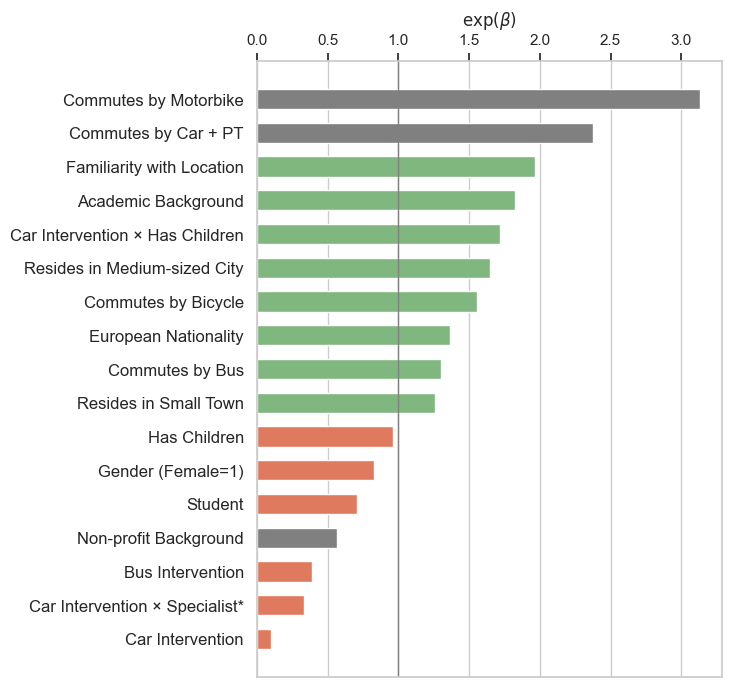

In [ ]:
odds_plt = dict()

[
    odds_plt.update({
        cool_names.get(_k): _v 
    }) if _k in cool_names else None for _k, _v in odds_ratios.sort_values(ascending=False).to_dict().items()
]

sns.set_theme(style="whitegrid")
palette = sns.color_palette("YlGnBu", n_colors=4)  

fig, ax = plt.subplots(figsize=(6, 8))
bar_height = 0.6

pastel_green = "#7FB77E" 
pastel_red = "#E07A5F"   

for name, value in odds_plt.items():
    if name in under_10_repr:
        color = "grey"
    else:
        color = pastel_red if value < 1 else pastel_green 

    ax.barh(
        name, value,
        height=bar_height,
        color=color,
    )

ax.axvline(x=1, color='grey', linewidth=1, linestyle='-')



ax.invert_yaxis()  # So highest values are on top
ax.xaxis.set_ticks_position('top')  # Move ticks to top
ax.xaxis.set_label_position('top')  # Move label to top if needed
ax.tick_params(axis='y', labelsize=12)  
ax.set_title(r"$\exp(\beta)$")
ax.grid(which="major", axis="y")


fig.show()

In [ ]:
columns_logit_final_int = [x for x in columns_master if x not in drops_logit_interactions] + ["specialist_car", "children_car", "metropolitan_encoded", "city_large", "active"]  #+ ["business_owner"]


df[columns_logit_final_int].corr().unstack().reset_index(drop=False).query("level_0 != level_1").sort_values(0, ascending=False).head(20)

,level_0,level_1,0
15,car,specialist_car,0.690012
300,specialist_car,car,0.690012
358,metropolitan_encoded,city_large,0.556771
377,city_large,metropolitan_encoded,0.556771
320,children_car,car,0.491304
16,car,children_car,0.491304
96,children,children_car,0.435494
324,children_car,children,0.435494
335,children_car,specialist_car,0.299510
316,specialist_car,children_car,0.299510


In [ ]:
print(result.summary().as_csv())

                     Logit Regression Results                    
Dep. Variable:  ,Y               ,  No. Observations:  ,  1504   
Model:          ,Logit           ,  Df Residuals:      ,  1485   
Method:         ,MLE             ,  Df Model:          ,    18   
Date:           ,Thu, 29 May 2025,  Pseudo R-squ.:     ,0.2305   
Time:           ,11:09:18        ,  Log-Likelihood:    , -640.48 
converged:      ,True            ,  LL-Null:           , -832.31 
Covariance Type:,nonrobust       ,  LLR p-value:       ,2.323e-70
                    ,   coef   , std err ,    z    ,P>|z| ,  [0.025 ,  0.975] 
const               ,    1.2538,    0.450,    2.788, 0.005,    0.372,    2.135
car                 ,   -2.3160,    0.236,   -9.813, 0.000,   -2.779,   -1.853
transit             ,   -0.9509,    0.183,   -5.185, 0.000,   -1.310,   -0.591
context             ,    0.6728,    0.230,    2.920, 0.003,    0.221,    1.124
female              ,   -0.2093,    0.147,   -1.425, 0.154,   -0.497,    0.07